In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("/content/bank (1).csv", delimiter=",")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df.apply(lambda x: sum(x.isnull()), axis = 0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


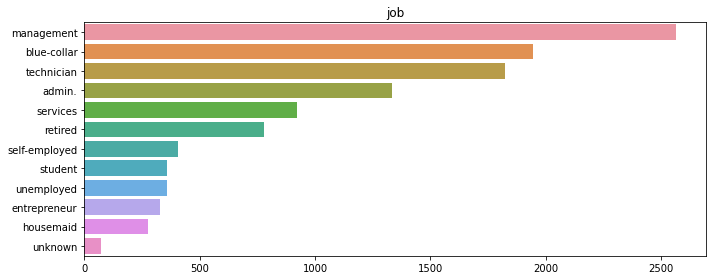

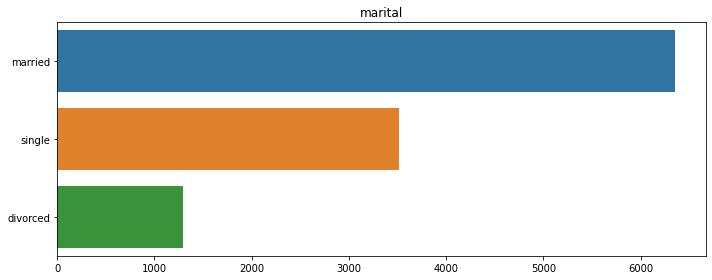

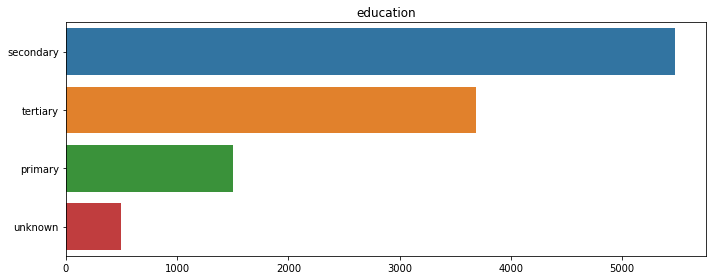

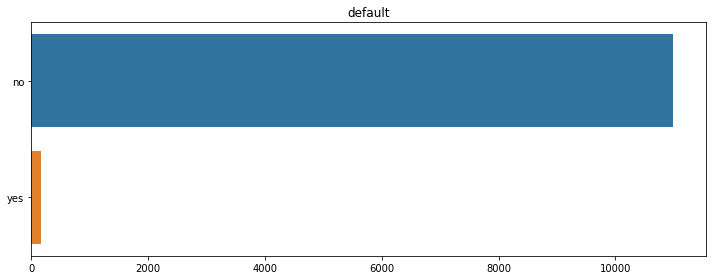

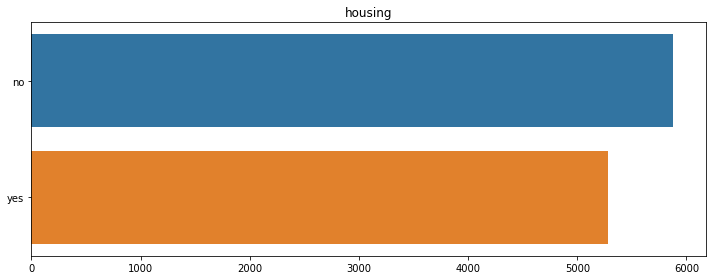

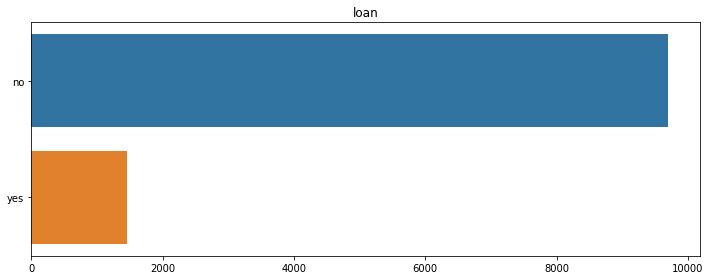

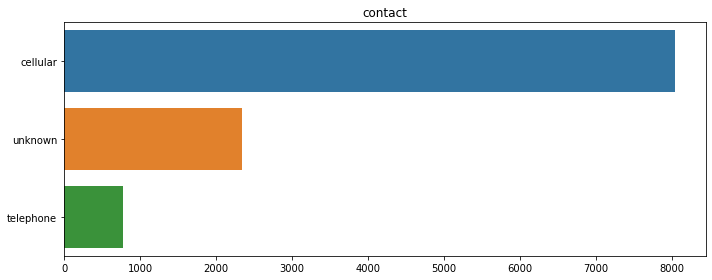

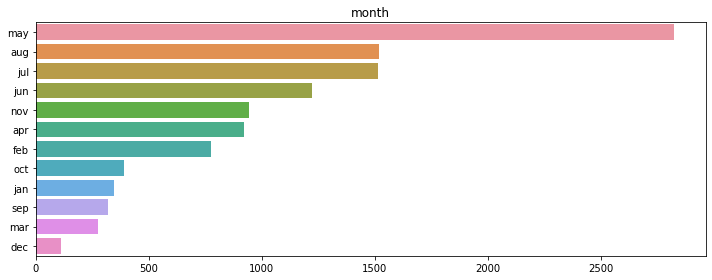

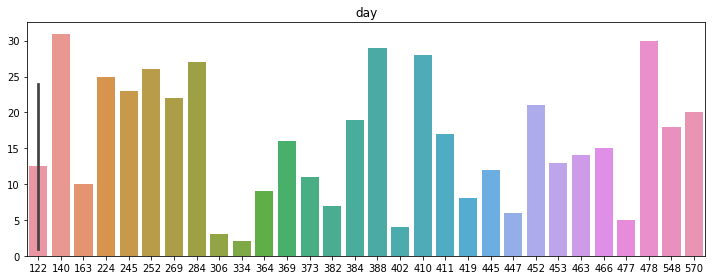

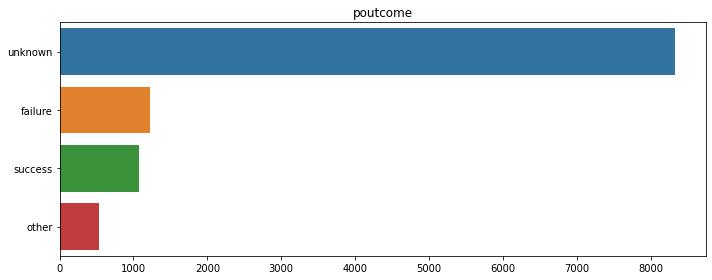

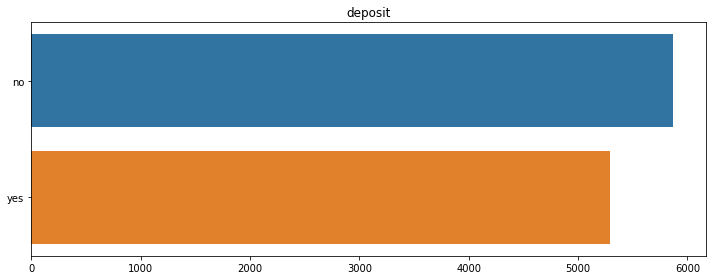

In [10]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day', 'poutcome','deposit']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [14]:
df["job"].value_counts().index

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur',
       'housemaid', 'unknown'],
      dtype='object')

In [15]:
# Check target variable distribution (Deposit)
count = df.groupby('deposit').size()
percent = count/len(df)*100
print(percent)

deposit
no     52.616019
yes    47.383981
dtype: float64


## job attribute

In [16]:
df_job=df[["job","deposit"]]
df_job.describe()

,job,deposit
count,11162,11162
unique,12,2
top,management,no
freq,2566,5873


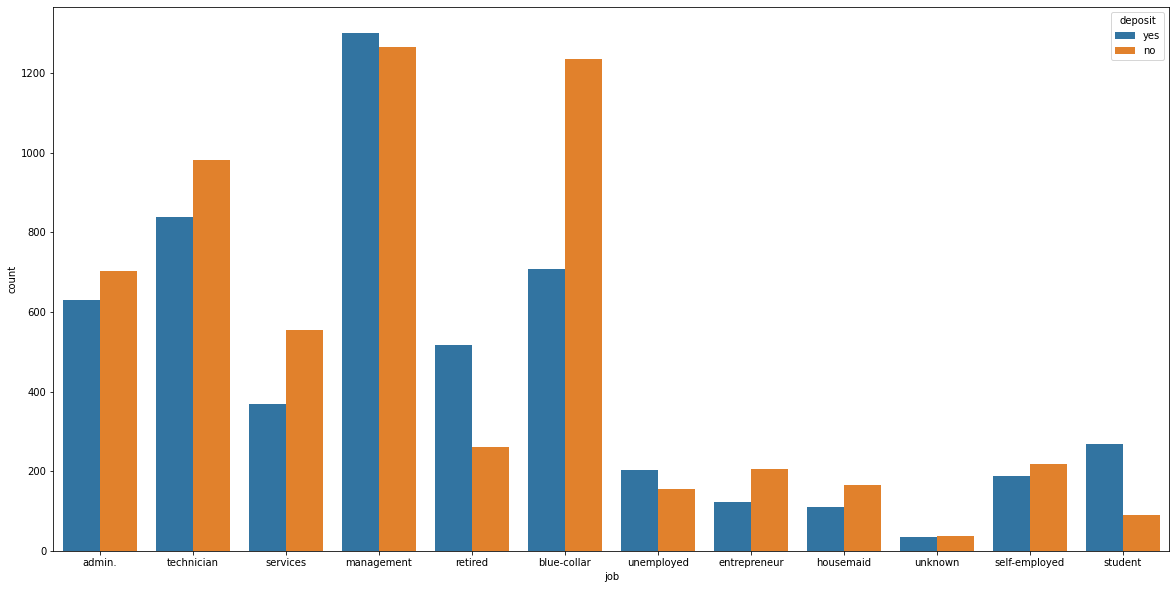

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x="job",hue="deposit",data=df)
plt.show()



*   Highest deposit customer rate belongs to Student and Retired

*   Customers with 'blue-collor' and 'services' are less likely to subcribe for term deposit.



##Marital attribute

In [18]:
df_marital = df[['marital', 'deposit']]
df_marital.describe()

,marital,deposit
count,11162,11162
unique,3,2
top,married,no
freq,6351,5873


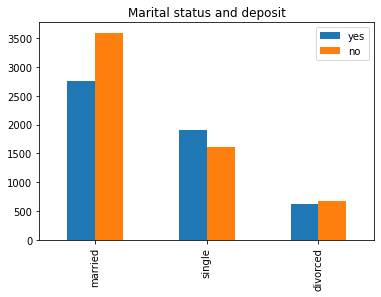

In [19]:
#marital status and deposit
job_df = pd.DataFrame()

job_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
job_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

job_df.plot.bar(title = 'Marital status and deposit')

##Education attribute

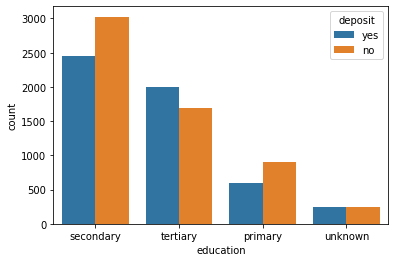

In [21]:
sns.countplot(x="education",hue="deposit",data=df)
plt.show()

##Default attribute

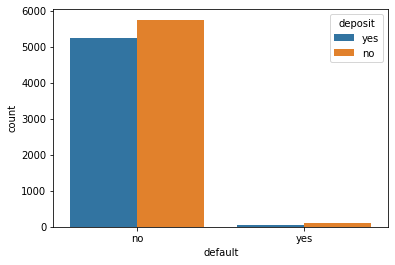

In [22]:
sns.countplot(x="default",hue="deposit",data=df)
plt.show()



*   Default is one of the most important variables for analysing credit customers. But in this dataset its look like no relation to deposit





##Housing attribute

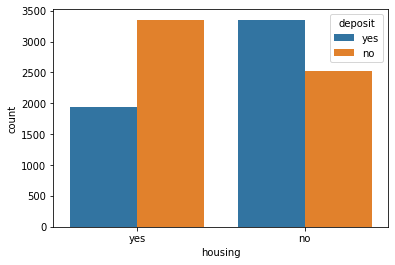

In [23]:
sns.countplot(x="housing",hue="deposit",data=df)
plt.show()



*   Clients who have housing loan seems don't have term deposit.
*   One important attribute to model.



##Loan attribute


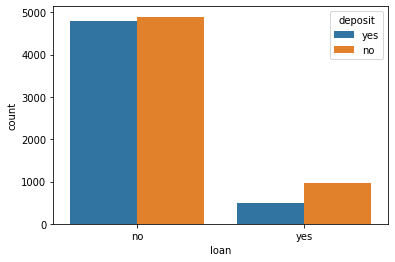

In [24]:
sns.countplot(x="loan",hue="deposit",data=df)
plt.show()



*   Loan category not as much correlated with deposit as housing




##Contact attribute


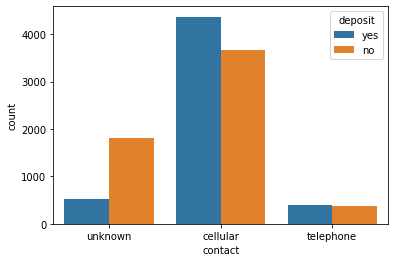

In [25]:
sns.countplot(x="contact", hue = "deposit", data=df)
plt.show()

##Month attribute


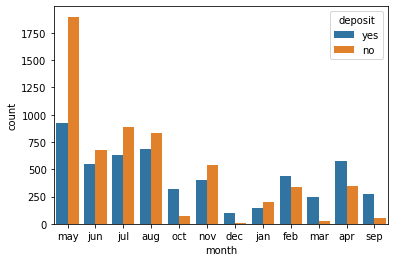

In [26]:
# last contact month
sns.countplot(x="month",hue="deposit",data=df)
plt.show()

##poutcome attribute


poutcome
failure    11.001613
other       4.810966
success     9.595055
unknown    74.592367
dtype: float64


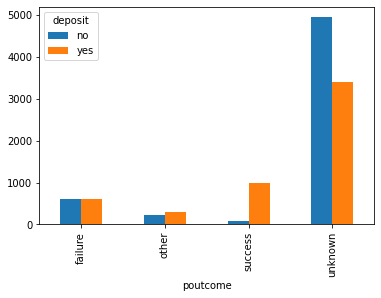

In [27]:
# "poutcome"
p_outcome = pd.crosstab(df['poutcome'], df['deposit'])
p_outcome.plot(kind='bar')
print(df.groupby(['poutcome']).size()/len(df)*100)



*   "poutcome" also have more than 74% missing values so we can drop this variable later




#NUMERICAL VISUALIZATION

##Age attribute


In [29]:
df_age=df[["age","deposit"]]
df_age.describe()

,age
count,11162.000000
mean,41.231948
std,11.913369
min,18.000000
25%,32.000000
50%,39.000000
75%,49.000000
max,95.000000


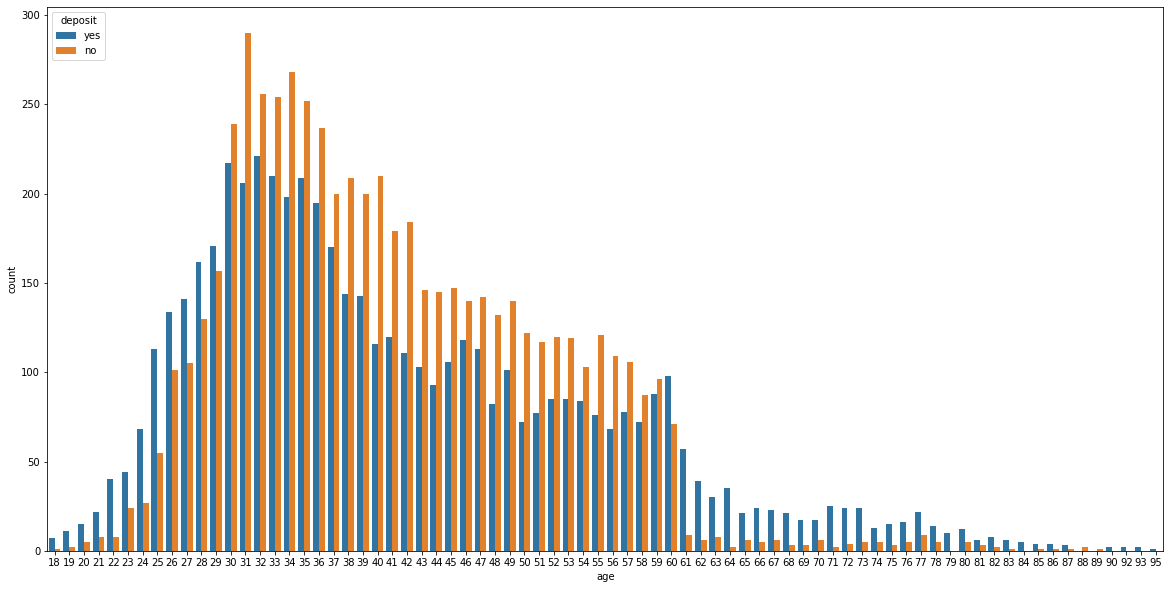

In [30]:
plt.figure(figsize=(20,10))
sns.countplot("age",data=df,hue="deposit")
plt.show()

Text(0, 0.5, 'balance')

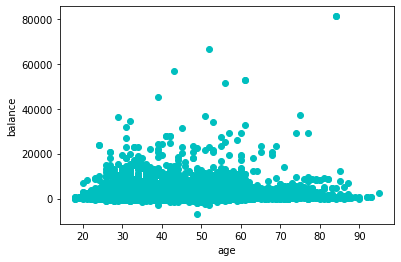

In [31]:
plt.scatter(df["age"],df["balance"],color="c")
plt.xlabel("age")
plt.ylabel("balance")



*   For the age out of 30-60 range, the customers term deposit ratio significantly increases

*   Age will be chosen as an important feature in all models



##Other attributes


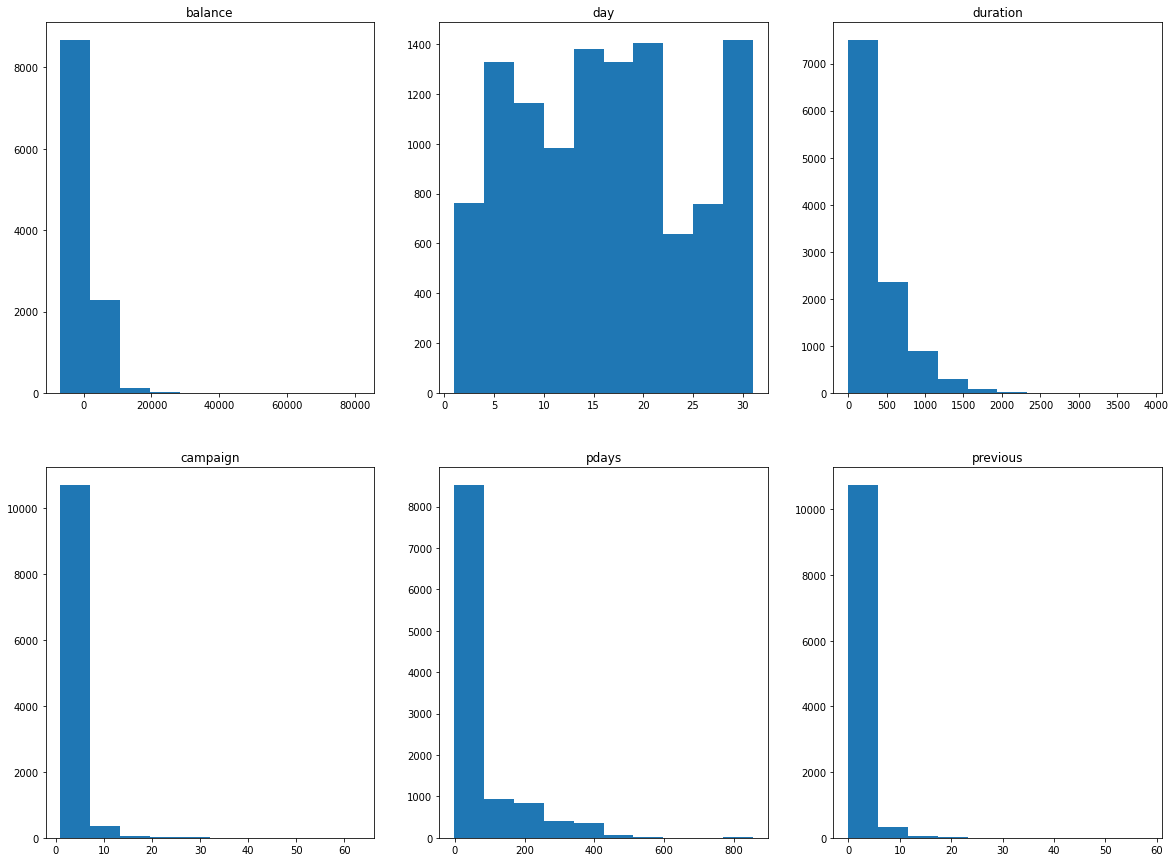

In [33]:
num_columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()



*   Numerical columns have outliers (pdays, campaign, previous).

*   Predict they are noisy data, then I will visualize closer to decide how can I manage the outlier.



##Data Transformation


In [35]:
df['default'].replace(['yes','no'],[1,0],inplace=True)
df['housing'].replace(['yes','no'],[1,0],inplace=True)
df['loan'].replace(['yes','no'],[1,0],inplace=True)
df['deposit'].replace(['yes','no'],[1,0],inplace=True)

##Check the correlation


In [37]:
df.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
age,1.000000,-0.011425,0.112300,-0.168700,-0.031418,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
default,-0.011425,1.000000,-0.060954,0.011076,0.076434,0.017342,-0.009760,0.030975,-0.036282,-0.035273,-0.040680
balance,0.112300,-0.060954,1.000000,-0.077092,-0.084589,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
housing,-0.168700,0.011076,-0.077092,1.000000,0.076761,-0.014770,0.035051,0.006660,0.064497,-0.000840,-0.203888
loan,-0.031418,0.076434,-0.084589,0.076761,1.000000,0.017269,-0.001914,0.034722,-0.030416,-0.022668,-0.110580
day,-0.000762,0.017342,0.010467,-0.014770,0.017269,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,-0.009760,0.022436,0.035051,-0.001914,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,0.030975,-0.013894,0.006660,0.034722,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,-0.036282,0.017411,0.064497,-0.030416,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous,0.020169,-0.035273,0.030805,-0.000840,-0.022668,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867


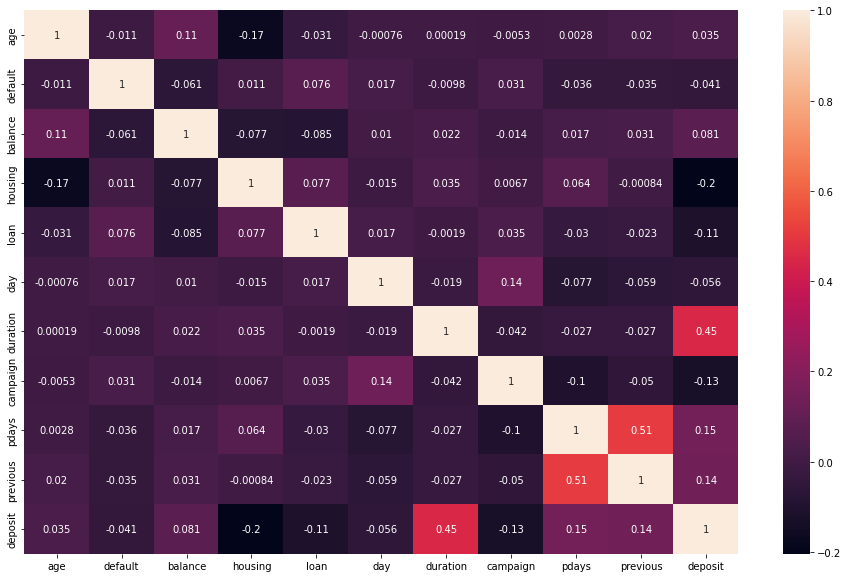

In [38]:
plt.figure(figsize=(16, 10))

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [39]:
df["pdays"].replace(-1,int(0),inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,0,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,0,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,0,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,0,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,0,0,unknown,1


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,1]=le.fit_transform(df.iloc[:,1])
df.iloc[:,2]=le.fit_transform(df.iloc[:,2])
df.iloc[:,3]=le.fit_transform(df.iloc[:,3])
df.iloc[:,8]=le.fit_transform(df.iloc[:,8])
df.iloc[:,10]=le.fit_transform(df.iloc[:,10])
df.iloc[:,15]=le.fit_transform(df.iloc[:,15])

In [43]:
X = df.drop(columns = ['day','deposit'])
Y = df['deposit']

In [45]:
X

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,8,1042,1,0,0,3
1,56,0,1,1,0,45,0,0,2,8,1467,1,0,0,3
2,41,9,1,1,0,1270,1,0,2,8,1389,1,0,0,3
3,55,7,1,1,0,2476,1,0,2,8,579,1,0,0,3
4,54,0,1,2,0,184,0,0,2,8,673,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,0,257,1,0,0,3
11158,39,7,1,1,0,733,0,0,2,6,83,4,0,0,3
11159,32,9,2,1,0,29,0,0,0,1,156,2,0,0,3
11160,43,9,1,1,0,0,0,1,0,8,9,2,172,5,0


##Data preprocessing

In [46]:
from sklearn import preprocessing 
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
min_max.fit(X).transform(X)

array([[0.53246753, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.49350649, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.2987013 , 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.18181818, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32467532, 0.81818182, 0.5       , ..., 0.20140515, 0.0862069 ,
        0.        ],
       [0.20779221, 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ]])